___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

In [1]:
import nltk
import pandas as pd
import seaborn as sns
import numpy as np
import string
import matplotlib.pyplot as plt
from tqdm import notebook


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BaseNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

sns.set_style('whitegrid')

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
df = pd.read_csv('./data/06_NLP_Yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [99]:
df.groupby('business_id').count()

,date,review_id,stars,text,type,user_id,cool,useful,funny,length
business_id,,,,,,,,,,
-0QBrNvhrPQCaeo7mTo0zQ,1,1,1,1,1,1,1,1,1,1
-0bUDim5OGuv8R0Qqq6J4A,1,1,1,1,1,1,1,1,1,1
-1N0Z3uM8xbxKS8XiAnaog,1,1,1,1,1,1,1,1,1,1
-34jE_5dujSWMIOBudQsiQ,1,1,1,1,1,1,1,1,1,1
-3WVw1TNQbPBzaKCaQQ1AQ,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...
zwToyWL4dT1clsFPK9wI2w,3,3,3,3,3,3,3,3,3,3
zxjMiqlfUuIQRltSuj9FpQ,1,1,1,1,1,1,1,1,1,1
zxqvU415r_RtZRKDtdbIKQ,2,2,2,2,2,2,2,2,2,2


In [100]:
df['type'].unique()

array(['review'], dtype=object)

In [7]:
df['length'] = df['text'].apply(len)

# EDA



**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

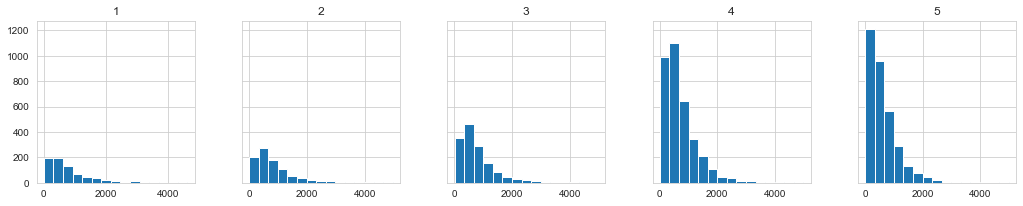

In [32]:
# fig, ax = plt.subplots(figsize=(15, 3))
df['length'].hist(by=df['stars'], sharey=True, bins=15,layout=(1, 5),xrot=0, figsize=(17, 3))
plt.show()

**Create a boxplot of text length for each star category.**

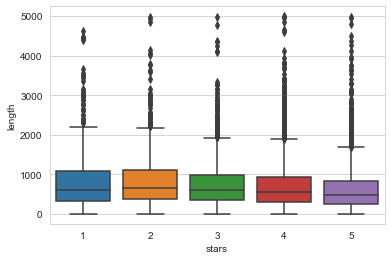

In [41]:
sns.boxplot(x='stars', y='length', data=df)

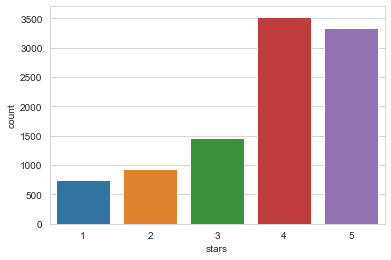

In [46]:
sns.countplot(data=df, x='stars')
plt.show()

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [47]:
df.groupby('stars').mean()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


## NLP Classification Task

In [140]:
# df_class = df[(df.stars==1) | (df.stars==5)]
df_class = df.copy()

In [141]:
X = df_class['text']
y = df_class['stars']

In [142]:
cv = CountVectorizer()

In [143]:
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [144]:
X = cv.fit_transform(X)

In [145]:
print(X.shape)

(10000, 29185)


## Training a Model

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
nb = MultinomialNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

## Predict and Evaluate

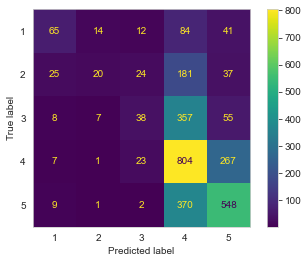

In [147]:
metrics.plot_confusion_matrix(nb, X=X_test, y_true=y_test)
plt.grid(False)
plt.show()

In [148]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.57      0.30      0.39       216
           2       0.47      0.07      0.12       287
           3       0.38      0.08      0.13       465
           4       0.45      0.73      0.55      1102
           5       0.58      0.59      0.58       930

    accuracy                           0.49      3000
   macro avg       0.49      0.35      0.36      3000
weighted avg       0.49      0.49      0.45      3000



In [ ]:
clf1 = MultinomialNB()
clf2 = RandomForestClassifier(n_jobs=-1)
clf3 = SVC()
clf4 = LogisticRegression(max_iter=1000, n_jobs=-1)
clf5 = GradientBoostingClassifier()
clfs_to_test = [clf1, clf2, clf3, clf4, clf5]
params = {
    f'{str(clf1.__str__()).lower().split("(")[0]}': {f'{str(clf1.__str__()).lower().split("(")[0]}__alpha': np.linspace(0, 1, 20)},
    f'{str(clf2.__str__()).lower().split("(")[0]}': {f'{str(clf2.__str__()).lower().split("(")[0]}__n_estimators': np.arange(0, 500, 20)},
    f'{str(clf3.__str__()).lower().split("(")[0]}': {f'{str(clf3.__str__()).lower().split("(")[0]}__C': [0.1, 1, 10, 100], 
                                                     f'{str(clf3.__str__()).lower().split("(")[0]}__gamma': [1, 0.1, 0.01, 0.001]},
    
    f'{str(clf4.__str__()).lower().split("(")[0]}': {f'{str(clf4.__str__()).lower().split("(")[0]}__C': np.logspace(-4, 4, 4)},
    f'{str(clf5.__str__()).lower().split("(")[0]}': {f'{str(clf5.__str__()).lower().split("(")[0]}__n_estimators': np.arange(0, 500, 10)}
}
for clf in notebook.tqdm(clfs_to_test):
    pipeline = Pipeline([
    (f'{str(clf.__str__()).lower().split("(")[0]}', clf),  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])
    search = GridSearchCV(pipeline, params[f'{str(clf.__str__()).lower().split("(")[0]}'], n_jobs=-1)
    search.fit(X_train, y_train)
    predictions = search.predict(X_test)
    print(round(metrics.accuracy_score(y_true=y_test, y_pred=predictions), 2), clf, search.best_params_)

0.52 MultinomialNB() {'multinomialnb__alpha': 0.3157894736842105}


# Using Text Processing


** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [93]:
pipeline = Pipeline([
    ('bag of words', CountVectorizer()),
    ('TfidfTransformer()', TfidfTransformer()),
    ('classification', RandomForestClassifier(n_jobs=-1))
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [94]:
X = df_class['text']
y = df_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)

### Predictions and Evaluation


In [95]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.75      0.04      0.08       220
           2       0.25      0.01      0.01       273
           3       0.55      0.01      0.03       443
           4       0.41      0.69      0.51      1064
           5       0.53      0.62      0.57      1000

    accuracy                           0.46      3000
   macro avg       0.50      0.28      0.24      3000
weighted avg       0.48      0.46      0.38      3000



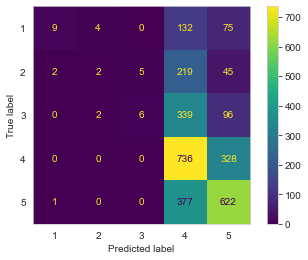

In [96]:
metrics.plot_confusion_matrix(pipeline, X=X_test, y_true=y_test)
plt.grid(False)
plt.show()

# GridsearchCV and Pipeline

In [129]:
clf1 = MultinomialNB()
clf2 = RandomForestClassifier(n_jobs=-1)
clf3 = SVC()
clf4 = LogisticRegression(max_iter=1000, n_jobs=-1)
clf5 = GradientBoostingClassifier()
clfs_to_test = [clf1, clf2, clf3, clf4, clf5]
params = {
    f'{str(clf1.__str__()).lower().split("(")[0]}': {f'{str(clf1.__str__()).lower().split("(")[0]}__alpha': np.linspace(0, 1, 20)},
    f'{str(clf2.__str__()).lower().split("(")[0]}': {f'{str(clf2.__str__()).lower().split("(")[0]}__n_estimators': np.arange(0, 500, 20)},
    f'{str(clf3.__str__()).lower().split("(")[0]}': {f'{str(clf3.__str__()).lower().split("(")[0]}__C': [0.1, 1, 10, 100], 
                                                     f'{str(clf3.__str__()).lower().split("(")[0]}__gamma': [1, 0.1, 0.01, 0.001]},
    
    f'{str(clf4.__str__()).lower().split("(")[0]}': {f'{str(clf4.__str__()).lower().split("(")[0]}__C': np.logspace(-4, 4, 4)},
    f'{str(clf5.__str__()).lower().split("(")[0]}': {f'{str(clf5.__str__()).lower().split("(")[0]}__n_estimators': np.arange(0, 500, 10)}
}
for clf in notebook.tqdm(clfs_to_test):
    pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    (f'{str(clf.__str__()).lower().split("(")[0]}', clf),  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])
    search = GridSearchCV(pipeline, params[f'{str(clf.__str__()).lower().split("(")[0]}'], n_jobs=-1)
    search.fit(X_train, y_train)
    predictions = search.predict(X_test)
    print(round(metrics.accuracy_score(y_true=y_test, y_pred=predictions), 2), clf, search.best_params_)

0.44 MultinomialNB() {'multinomialnb__alpha': 0.05263157894736842}
0.46 RandomForestClassifier(n_jobs=-1) {'randomforestclassifier__n_estimators': 360}
0.53 SVC() {'svc__C': 10, 'svc__gamma': 1}
0.51 LogisticRegression(max_iter=1000, n_jobs=-1) {'logisticregression__C': 21.54434690031882}
0.49 GradientBoostingClassifier() {'gradientboostingclassifier__n_estimators': 130}

